## story1:Here we analyse how users of different occupations rate different genres of movies
## story2:Here we analyse how users of different ages rate different genres of movies
## story3:Here we analyse how many no.of different genres are released in each year
## story4:Here we analyse that movies released in which year are getting maximum ratings by looking at the trend of ratings.

In [237]:
#import statements
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [238]:
#Loading data into pandas
data_user = pd.read_table('u.user', header = None, sep = "|")
data_user.columns = ['user_id', 'age', 'gender', 'occupation', 'zip code']
data_udata = pd.read_table('u.data', header=None, delim_whitespace = True)
data_udata.columns = ['user_id', 'item id', 'rating', 'timestamp']

In [239]:
#merging dataframes data_user and data_udata
df_merged_user_udata = pd.merge(data_user, data_udata, on = 'user_id', how = 'outer')
#removing unwanted columns
df_merged_user_udata.drop(['zip code', 'rating', 'timestamp'], axis = 1, inplace = True)

In [240]:
#uploading u.user into panda
data_item = pd.read_table('u.item', header = None, sep = "|" , encoding = "ISO-8859-1")
data_item.columns = ['item id','movie title','release date','video release date','IMDb URL','unknown','Action','Adventure','Animation',
                  'Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi',
                  'thriller','War','Western']
#removing unwanted columns
data_item.drop(['movie title', 'release date', 'video release date', 'IMDb URL'], axis = 1, inplace = True )

## story1

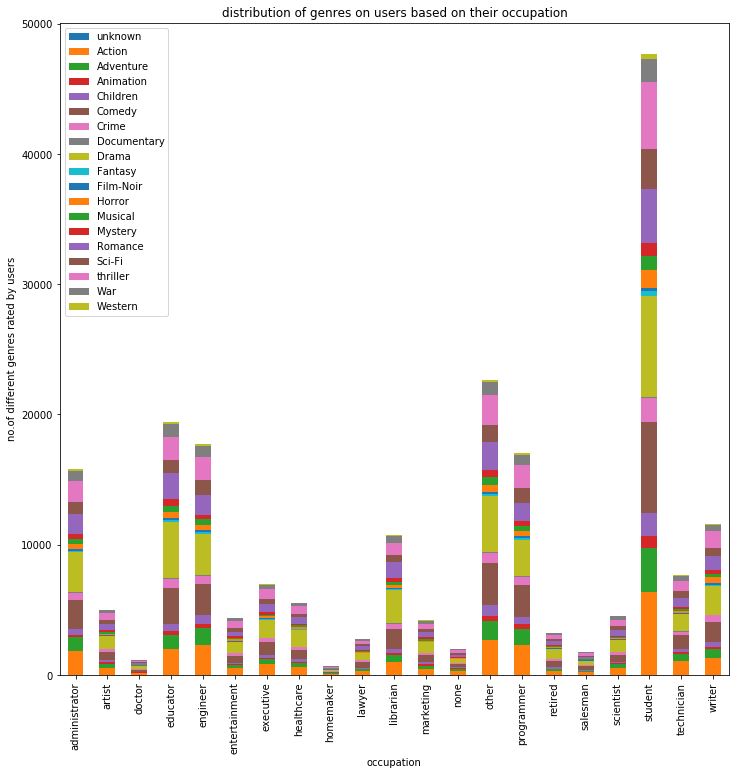

In [244]:
#creating new dataframe by merging data_item and df_merged_user_udata
df_genres_gender = pd.merge(df_merged_user_udata, data_item, on = 'item id', how = 'outer')
df_genres_gender.drop(['user_id', 'item id'], axis = 1, inplace = True)
#finding the no.of movies of different genres rated by users of different occupations
genre_groupedby_occupation = df_genres_gender.groupby('occupation').sum()
genre_groupedby_occupation.drop('age', axis = 1, inplace = True)
#plotting the distribution of genres on users based on their occupation
genre_groupedby_occupation.plot(kind='bar', stacked = True, figsize = (12,12))
plt.xlabel('occupation')
plt.ylabel('no.of different genres rated by users')
plt.title('distribution of genres on users based on their occupation')
plt.show()

## story2

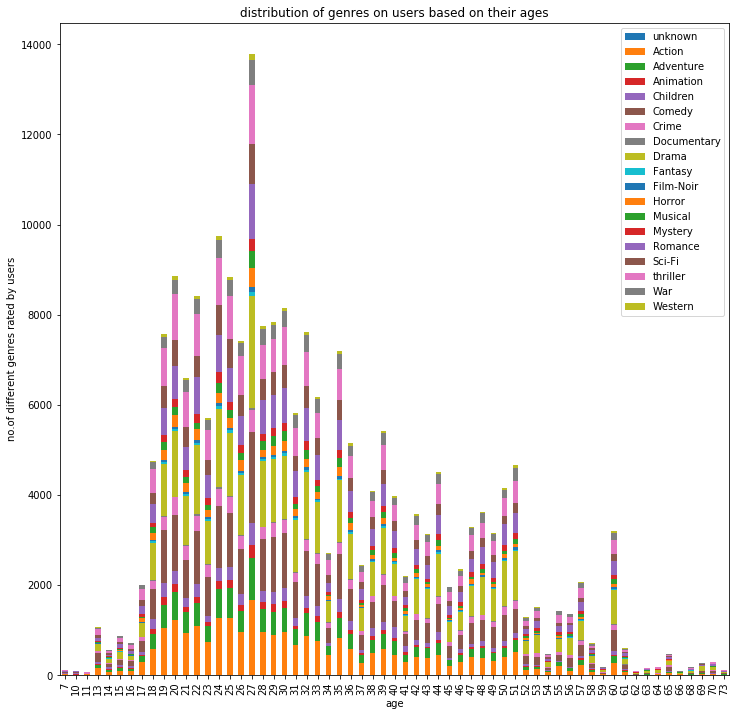

In [245]:
#finding the no.of movies of different genres rated by users of different ages
genre_groupedby_age = df_genres_gender.groupby('age').sum()
genre_groupedby_age.head()
#plotting the distribution of genres on users based on their ages
genre_groupedby_age.plot(kind='bar', stacked = 'True', figsize=(12,12))
plt.title('distribution of genres on users based on their ages')
plt.ylabel('no.of different genres rated by users')
plt.xlabel('age')
plt.show()

## story3

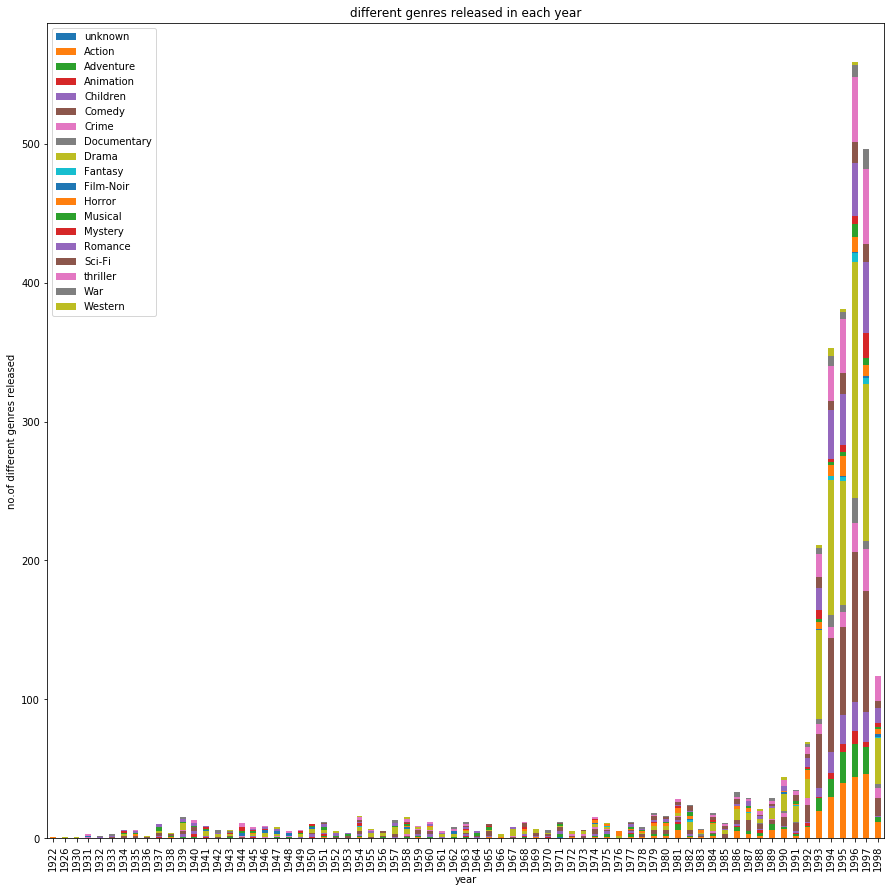

In [246]:
#loading u.item into pandas
data_item_other = pd.read_table('u.item', header = None, sep = "|", usecols = [0,2], encoding = "ISO-8859-1")
data_item_other.columns = ['item id', 'date']
#extracting the year of release from date of release by using string function
years = data_item_other['date'].str.rsplit('-').str[2]
new_data_item = pd.concat([data_item, years], axis = 1)
new_data_item.drop('item id', axis = 1, inplace = True)
#finding the no.of movies of different genres released in a particular year
y=new_data_item.groupby('date').sum()
#plotting the different genres released in each year
y.plot(kind = 'bar', figsize = (15,15), stacked = True)
plt.xlabel('year')
plt.ylabel('no.of different genres released')
plt.title('different genres released in each year')
plt.show()

## story4

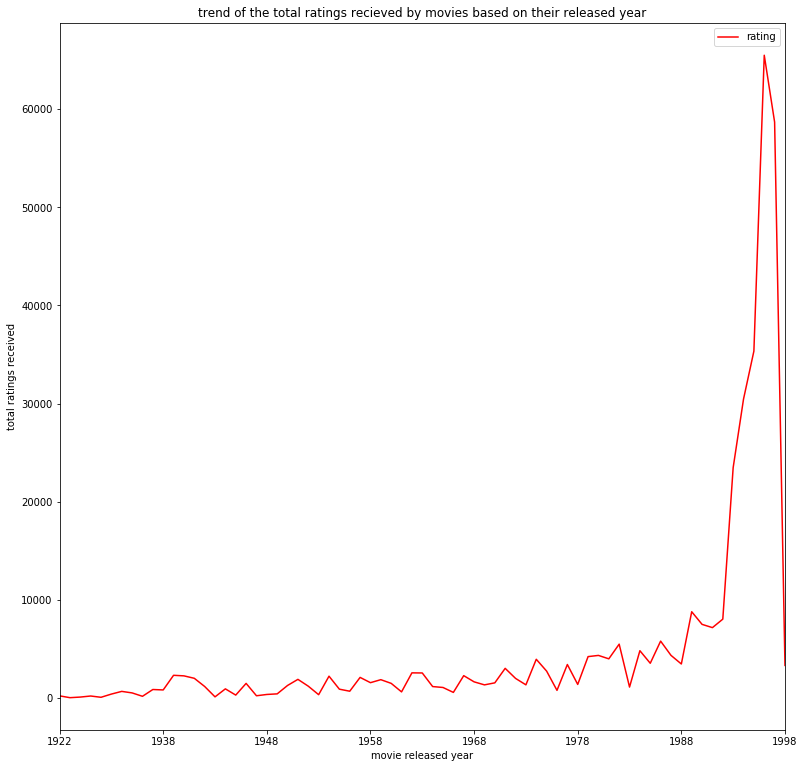

In [247]:
#concatenating years series to data_item_others
new_data_item_other = pd.concat([data_item_other, years], axis = 1)
col_names = ['item id', 'date', 'years']
#renaming column names in new_data_item_other
new_data_item_other.columns = col_names
new_data_item_other.drop('date', axis = 1, inplace = True)
new_data_item_other.head()
#merging new_data_item_other and data_udata
df_merged_item_udata = pd.merge(new_data_item_other, data_udata, on = 'item id', how = 'outer')
df_merged_item_udata.drop(['item id', 'user_id', 'timestamp'], axis = 1, inplace = True)
#finding the ratings of users based on the movie released year
rating_groupedby_year = df_merged_item_udata.groupby('years').sum()
rating_groupedby_year.plot(color = 'r', figsize = (13,13))
plt.title('trend of the total ratings recieved by movies based on their released year')
plt.ylabel('total ratings received')
plt.xlabel('movie released year')
plt.show()